# Demo


In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import cv2
from IPython.display import Image
import os


%load_ext autoreload
%autoreload 2

# allow displaying multiple outputs
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)


## Args

In [2]:
headshot_folder = './data/Headshot/'
identity_folder = './data/Identity/'


# Convert files to jpeg if needed

In [3]:
# a function that reads the images in a folder and if not already a jpg, saves them
def convert_to_jpg(folder):
    # find the image names in the folder and iterate through them
    images = os.listdir(folder)
    for image in images:
        # if the image is not a jpg, convert it to jpg
        if not image.endswith('.jpg'):
            # read the image
            image_path = f"{folder}{image}"
            img = cv2.imread(image_path)
            # save the image as a jpg
            new_image_path = f"{folder}{image.split('.')[0]}.jpg"
            cv2.imwrite(new_image_path, img)
            # delete the old image
            os.remove(image_path)

convert_to_jpg_flag = False

if convert_to_jpg_flag:
    convert_to_jpg(headshot_folder)
    convert_to_jpg(identity_folder)

## Import data

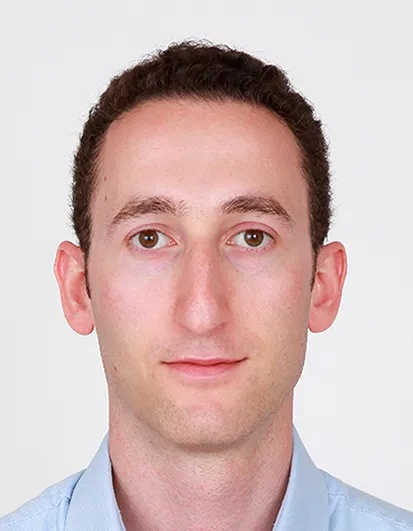

Image area: 219,303
Face area: 91,204
Face area / Image area: 41.59%


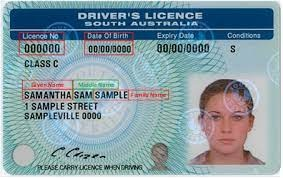

Image area: 50,374
Face area: 3,600
Face area / Image area: 7.15%


In [4]:
def calculate_face_area(image_path, verbose=True):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the face cascade classifier
    # face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # If no faces are found, return 0
    if len(faces) == 0:
        # print the file name and show the image
        print(f"No faces found in {image_path}")
        display(Image(filename=image_path))
        return 0

    # Calculate the area of the first face found
    x, y, w, h = faces[0]
    face_area = w * h

    # Calculate the area of the entire image
    height, width = image.shape[:2]
    image_area = height * width

    if verbose:
        display(Image(filename=image_path))
        print(f"Image area: {image_area:,}")
        print(f"Face area: {face_area:,}")
        print(f"Face area / Image area: {face_area / image_area:.2%}")

    return face_area / image_area

image_path = f"{headshot_folder}1737-09-sized.jpg"
_ = calculate_face_area(image_path)

image_path = f"{identity_folder}download (1).jpg"
_ = calculate_face_area(image_path)


No faces found in ./data/Headshot/OIP (5).jpg


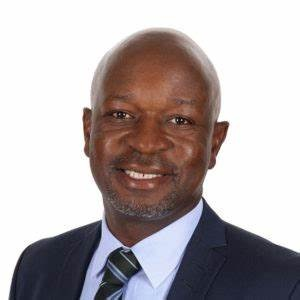

No faces found in ./data/Identity/images (11).jpg


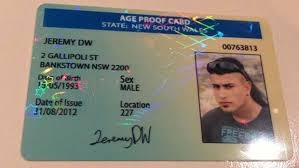

No faces found in ./data/Identity/images (14).jpg


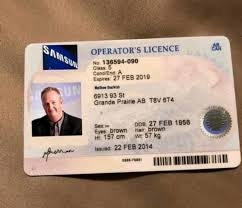

No faces found in ./data/Identity/images (22).jpg


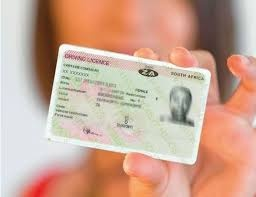

No faces found in ./data/Identity/images (27).jpg


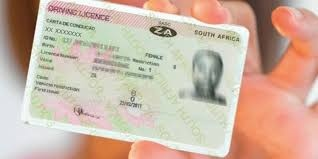

Headshot photos:
Min face area: 0.00%
Max face area: 41.59%
Average face area: 22.74%
Median face area: 23.20%
Identity photos:
Min face area: 0.00%
Max face area: 8.91%
Average face area: 4.06%
Median face area: 4.02%


In [5]:
# go through the image files in the headshot_folder folder and calculate the face area for each image
headshot_face_df = pd.DataFrame(columns=['image', 'face_image_ratio'])
# find the image names in the folder and iterate through them
images = os.listdir(headshot_folder)
for image in images:
    # calculate the face area for the image
    image_path = f"{headshot_folder}{image}"
    face_area = calculate_face_area(image_path, verbose=False)
    # add details as a new row to the dataframe
    new_row = {'image': image, 'face_image_ratio': face_area}
    headshot_face_df = pd.concat([headshot_face_df, pd.DataFrame([new_row])])

# go through the image files in the identity_folder folder and calculate the face area for each image
identity_face_df = pd.DataFrame(columns=['image', 'face_image_ratio'])
# find the image names in the folder and iterate through them
images = os.listdir(identity_folder)
for image in images:
    # calculate the face area for the image
    image_path = f"{identity_folder}{image}"
    face_area = calculate_face_area(image_path, verbose=False)
    # append the details as a new row to the dataframe
    new_row = {'image': image, 'face_image_ratio': face_area}
    identity_face_df = pd.concat([identity_face_df, pd.DataFrame([new_row])])

# print stats (min, max, mean, median)

print('Headshot photos:')
print(f"Min face area: {min(headshot_face_df['face_image_ratio']):.2%}")
print(f"Max face area: {max(headshot_face_df['face_image_ratio']):.2%}")
print(f"Average face area: {np.mean(headshot_face_df['face_image_ratio']):.2%}")
print(f"Median face area: {np.median(headshot_face_df['face_image_ratio']):.2%}")

print('Identity photos:')
print(f"Min face area: {min(identity_face_df['face_image_ratio']):.2%}")
print(f"Max face area: {max(identity_face_df['face_image_ratio']):.2%}")
print(f"Average face area: {np.mean(identity_face_df['face_image_ratio']):.2%}")
print(f"Median face area: {np.median(identity_face_df['face_image_ratio']):.2%}")


No faces found in ./data/Headshot/OIP (5).jpg


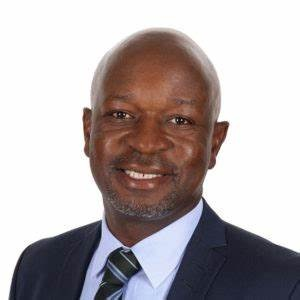

No faces found in ./data/Identity/images (11).jpg


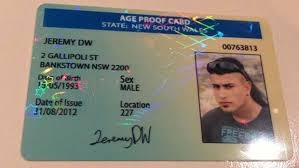

No faces found in ./data/Identity/images (14).jpg


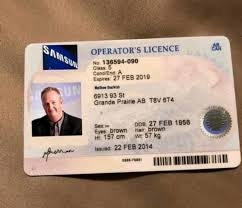

No faces found in ./data/Identity/images (22).jpg


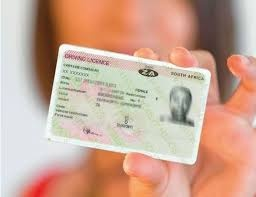

No faces found in ./data/Identity/images (27).jpg


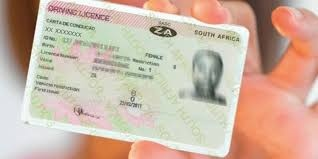

,folder,image,face_image_ratio,is_headshot
0,headshot,0998488474d203e03366e7b787eec930.jpg,0.023991,False
0,headshot,1737-09-sized.jpg,0.415881,True
0,headshot,3107316-large.jpg,0.306178,True
0,headshot,Agnieszka-Glica.jpg,0.327488,True
0,headshot,background_fixed.jpg,0.263511,True
0,headshot,Desislava-Miteva.jpg,0.251957,True
0,headshot,emanuela-contora.1024x1024.jpg,0.178803,True
0,headshot,fj_passport_35x45mm.jpg,0.002274,False
0,headshot,Mxolisi-400x400.jpg,0.191406,True
0,headshot,OIP (1).jpg,0.196568,True


In [6]:
threshold = 0.1

# go through the image files in the headshot_folder folder and calculate the face area for each image
results_df = pd.DataFrame(columns=['folder', 'image', 'face_image_ratio', 'is_headshot'])
# find the image names in the folder and iterate through them
images = os.listdir(headshot_folder)
for image in images:
    # calculate the face area for the image
    image_path = f"{headshot_folder}{image}"
    face_ratio = calculate_face_area(image_path, verbose=False)
    is_headshot_result = face_ratio >= threshold
    # append the details as a new row to the dataframe
    new_row = {'folder': 'headshot', 'image': image, 'face_image_ratio': face_ratio, 'is_headshot': is_headshot_result}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])])

# find the image names in the folder and iterate through them
images = os.listdir(identity_folder)
for image in images:
    # calculate the face area for the image
    image_path = f"{identity_folder}{image}"
    face_ratio = calculate_face_area(image_path, verbose=False)
    is_headshot_result = face_ratio >= threshold
    # append the details as a new row to the dataframe
    new_row = {'folder': 'identity', 'image': image, 'face_image_ratio': face_ratio, 'is_headshot': is_headshot_result}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])])

# print the results
results_df



In [7]:
# results_df.to_clipboard(index=False)